<a href="https://colab.research.google.com/github/isurushanaka/AII_Course-1/blob/main/Neural%20Networks/7_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP (Natural Language Processing)

### 1. Text to Numeric

* When dealing with text, it has to be encoded so that it can be easily processed by a neural network.

* To encode the words, we could use their ASCII (American Standard Code for Information Interchange) values.
![ASCII Table](https://www.johndcook.com/ascii.png)

* However, using ASCII values limits our semantic understanding of the sentence.
* Ex: In the below two words, we have the same letters thus having the same ASCII values but each word is having a completely opposite meaning.
* Therefore, using ASCII values to extract meaning from the words is daunting task.
![example 1](https://miro.medium.com/v2/resize:fit:640/format:webp/1*cUNtGgZxxyNIEtx15T1Ubw.png)

* Next, instead of labelling each letter with a number (i.e. ASCII values), we can label each word.
* Ex: In the below sentences, we have labelled each word with a number.
![example](https://miro.medium.com/v2/resize:fit:640/format:webp/1*uVqOzeZd4q8fareUtkZkPQ.png)

* When we only view the labels and we can observe the pattern.
![example](https://miro.medium.com/v2/resize:fit:640/format:webp/1*vY3z3R5e12fB-p-16X0e9w.png)

* Now, we can see similarity between the sentences.
* we can begin to train a neural network which can understand the meanings of the sentences.

* When coding, we can label each word and provide a dictionary of the words being used in the sentences using the **Tokenizer**.
* We create an instance of tokenizer and assign a hyperparameter num_words to 100.
* This essentially takes the most common 100 words and tokenize them.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
sentences = [
    'I Love my dog',
    'I love my cat'
]

In [ ]:
tokenizer = Tokenizer(num_words = 100)

tokenizer.fit_on_texts(sentences)  #The fit_on_texts() method is used to encode the sentences.
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


* The **word_index** method returns a dictionary of key value pairs where the key is the word in the sentence and the value is the label assigned to it.
* Notice that **‘I’** has been replaced by **‘i’** and both **'Love'** and **'love'** has been replaced by **'love'**.

In [ ]:
sentences = [
    'I Love my dog',
    'I love my cat',
    'You love my dog!'
]

In [ ]:
tokenizer = Tokenizer(num_words = 100)

tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


* Tokenizer is intellegent and it ommits the punctuations when tokenizing
* Notice, that **‘dog!’** is not treated as a separate word just because there is an exclamation

* Passing set of sentences to the **‘texts_to_sequences()’** method converts the sentences to their labelled equivalent based on the corpus of words passed to it.
* If the corpus has a word missing that is present in the sentence, the word while being encoded to the label equivalent is omitted and the rest of the words are encoded and printed.
* Ex:

In [ ]:
test_data = [
    'i really love my dog',
    'my dog loves my parrot'
]
seq_data = tokenizer.texts_to_sequences(test_data)
print(seq_data)

[[3, 1, 2, 4], [2, 4, 2]]


* In the above test_data, the word **‘really’** is missing in the corpus.
* Hence, while encoding, the word **‘really’** is omitted and instead the encoded sentence is **‘i love my dog’**.
* Similarly, for the second sentence, the words **‘loves’**, **‘parrot’** is missing in the word corpus.
* Hence, the encoded sentence is **‘my dog my’**.
* To overcome the problem faced in the above examples, we can **either use a huge corpus of words** or use a hyperparameter **‘oov_token’** and assign it to a certain value which will be used to encode words previously unseen in the corpus.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
sentences = [
    'I Love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


* Notice that **‘<00V>’** is now part of the word_index.
* Any word not present in the sentences will replaced by the ‘<00V>’ encoding.

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)

test_data = [
    'i really love my dog',
    'my dog loves my parrot'
]
seq_data = tokenizer.texts_to_sequences(test_data)
print(seq_data)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


* When feeding training data to the neural network, a **uniformity** of the data must be maintained.
* i.e. All sentences being fed should be in similar dimensions.
* In NLP, while feeding training data in the form of sentences, **padding** is used to provide uniformity in the sentences.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I Love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences)

print("sequences")
print(sequences)
print("\n padded sequences")
print(padded)

sequences
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

 padded sequences
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


* As we can see, padding in the form of **‘00’** is generated in the beginning of the sentence.
* Padding has been done with reference to the longest sentence.

* If padding is to be done after the sentence, the hyperparameter **padding** can be set to **‘post’**.
* Padding is generally done with reference to the longest sentence, however the hyperparameter **maxlen** can be provided to override it and define the maximum length of the sentence.
* However, with use of **maxlen** the information in sentences could be lost as only a certain length of the sentence is taken.
* But you can specify from where the words are omitted.
* Ex: Setting it to **‘post’** allows you to loose words from the end of the sentence.

In [ ]:
padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=5)

print(padded)

[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


### 2. Word Embeddings

* Words and associated words are clustered as vectors in a multi-dimensional space.
* This allows the Words that are present in a sentence and often words with similar meanings to be placed close to each other in the multi-dimensional space.
* Ex: “The movie was **dull** and **boring**.”; “The movie was **fun** and **exciting**.”

* Now imagine we pick up a vector in a higher dimensional space, suppose 16 dimensions and words that are found together are given similar vectors.
* Overtime, words of similar meaning begin to cluster together.
* The meaning of the words can come from labelling the dataset.

* So taking the example of the above sentence, the words dull and boring show up a lot in the negative review, therefore they have a similar sentiment and they show up close to each other in a sentence, thus their vectors will be similar.
* As the neural network trains, it can learn these vectors and associate them with the labels to come up with something called and embedding
* i.e. the vectors of each word with their associated sentiment.

In [ ]:
max_length=5 # lenght of the sentences
vocab_size=100
embedding_dim=16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

* Now while building the neural network, we use the **Embedding layer** which gives an output of the shape of a 2D array with length of the sentence as one dimension and the embedding dimension, in our case 16 as the other dimension.

* Therefore, we use the **Flatten layer** just as we used it in computer vision problems.
* In CNN based problems, a 2D array of pixels was needed to be flattened to feed it to the neural network.
* In a NLP based problem the 2D array of Embiddings is needed to be flattened.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 16)             1600      
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 6)                 486       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 2,093
Trainable params: 2,093
Non-trainable params: 0
_________________________________________________________________


* Alternately, we can use GlobalAveragePooling1D layer which works similar to **Flatten** layer

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 16)             1600      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,709
Trainable params: 1,709
Non-trainable params: 0
_________________________________________________________________


* Now the model is simpler and therefore faster.
* However, upon analysis it was found that the above model even though being faster than the Flatten model, performed with a slightly lower accuracy.

#### [IMDB Movie Review Dataset](https://medium.com/@pyashpq56/sentiment-analysis-on-imdb-movie-review-d004f3e470bd)

[tf.keras.datasets.imdb](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data)

In [ ]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=None,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=start_char,
    oov_char=oov_char,
    index_from=index_from,
)

In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [ ]:
len(x_train[0])

218

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()

# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"

1641221/1641221 [==============================] - 1s 1us/step


In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
inverted_word_index

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [ ]:
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
decoded_sequence

"[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [ ]:
([len(seq) for seq in x_train])

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, padding='post', truncating='post', maxlen=128)
x_test = pad_sequences(x_test, padding='post', truncating='post', maxlen=128)


In [ ]:
len(x_train[0])

128

In [ ]:
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
decoded_sequence

"[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and"

In [ ]:
vocab_size = len(word_index)+1
embedding_dim = 16
max_length = 128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 128, 16)           1417360   
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 6)                 102       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,417,469
Trainable params: 1,417,469
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),verbose=1)

Epoch 1/30
782/782 [==============================] - 29s 36ms/step - loss: 0.5610 - accuracy: 0.5000 - val_loss: 0.4178 - val_accuracy: 0.5000
Epoch 2/30
782/782 [==============================] - 27s 35ms/step - loss: 0.3133 - accuracy: 0.5000 - val_loss: 0.3605 - val_accuracy: 0.5000
Epoch 3/30
782/782 [==============================] - 28s 35ms/step - loss: 0.2200 - accuracy: 0.5000 - val_loss: 0.3612 - val_accuracy: 0.5000
Epoch 4/30
782/782 [==============================] - 29s 37ms/step - loss: 0.1612 - accuracy: 0.5000 - val_loss: 0.3849 - val_accuracy: 0.5000
Epoch 5/30
782/782 [==============================] - 29s 37ms/step - loss: 0.1167 - accuracy: 0.5000 - val_loss: 0.4216 - val_accuracy: 0.5000
Epoch 6/30
782/782 [==============================] - 29s 37ms/step - loss: 0.0831 - accuracy: 0.5000 - val_loss: 0.4639 - val_accuracy: 0.5000
Epoch 7/30
782/782 [==============================] - 35s 45ms/step - loss: 0.0583 - accuracy: 0.5000 - val_loss: 0.5196 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

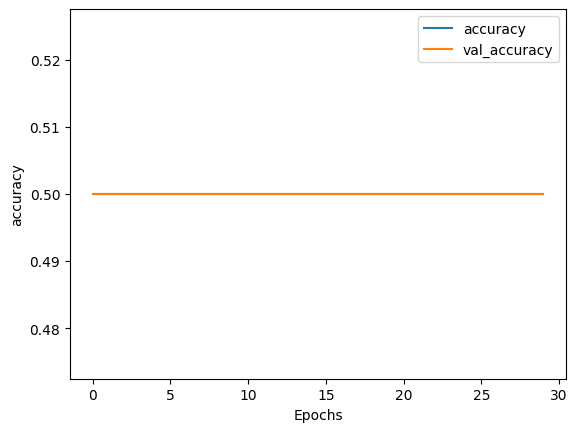

In [ ]:
plot_graphs(history, 'accuracy')

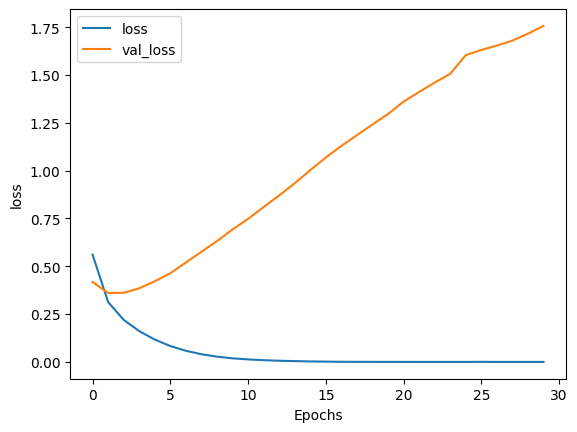

In [ ]:
plot_graphs(history, 'loss')

* We tried to implement a classifier that attempted to classify sentences on the basis of text.
* We tried to do this by tokenizing the words and noticed our classifier **failed** to get any meaningful results.
* The reason for this was that it was hard to understand the context of the words when it was broken down into subwords.
* **Understanding the sequence** in which the subwords occur is necessary to understand their meaning.

* Analyzing the **recurrence**, you can identify the sequence in which the numbers follow.
* This sequence is not explicitly mentioned in the data.
* The sequence is derived through the neural network.

##### Example

* The below diagram is the sequence of a fibonacci series.

![fibonacci](https://miro.medium.com/v2/resize:fit:640/format:webp/1*IbnaSh3-MRuyRppZ3Bw3cA.png)

* The above sequence works in a recurrence, i.e.

![fibonacci recurrance](https://miro.medium.com/v2/resize:fit:640/format:webp/1*shHk63a9Rva0VnlY9N9D_Q.png)

* The recurrent function of the fibonacci series can be represented by the following diagram where **Xt** is the initial numbers for the series.
* The function then outputs **yt**, i.e. the sum of the first two numbers.
* The sum value is carried to the next iteration where it gets added to the second number and outputs another value.
* The sequence goes on.

![RNN](https://miro.medium.com/v2/resize:fit:452/format:webp/1*ONokzMR6mJHxsbggK0dlHA.png)

* The above recurrent function when unwrapped would look like this:

![RNN_Unwrapped](https://miro.medium.com/v2/resize:fit:640/format:webp/1*aK8KvJ3_121SVV_Y5N9xww.png)

* We can observe that the current output is highly dependent on the immediate previous step and is least dependent on the initial steps
* This forms the basis of a recurrent neural network (RNN)

### RNN

* This brings up a new challenge when trying to classify text.
* Example:

![sample](https://miro.medium.com/v2/resize:fit:468/format:webp/1*7_39MTnZrkjJEUjBI6_i5Q.png)

* In this case the context word that helps us to predict the next word is very close to the word we are interested in i.e. the word **“blue”** is next to the word we are interested in **“sky”**.

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*iAg7-vkA5IgkmlsHCzG7kQ.png)

* However, we may also encounter cases where the context words required to predict the interested word is present perhaps at the beginning of the sentence.
* Here the concept of an RNN can fail as it tries to predict the interested word by taking into consideration the words immediately preceding it.

* In the above sentence, we can observe that context word **“Ireland”** appears much earlier in the sentence while the interested word **“Gaelic”** appears later.
* An RNN would most likely attempt to predict the word **“Gaelic”** by taking into account the words immediately preceding it i.e. **“speak”**, **“to”**, **“how”**; but none of these words would facilitate the prediction of the word **“Gaelic”**.

* In such cases we need a modification of the **RNN**

### LSTM (Long Short Term Memory)

![LSTM-1D](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Gn2kTBy8_eN2F8SRSuyjFQ.png)

* In these type of networks, in addition to the context being passed like in an RNN, the LSTM have an additional pipeline of context called Cell State which passes through the network.
* This helps to keep the context from earlier tokens or steps relevant in later ones to overcome the challenge discussed earlier.

![LSTM-bidirectional](https://miro.medium.com/v2/resize:fit:640/format:webp/1*cMdOzAUGtuflkkDYn7T1GA.png)

* Cell State can be bidirectional so that tokens appearing later in a sentence can impact the earlier tokens.

In [ ]:
vocab_size = len(word_index)+1
embedding_dim = 64
max_length = 128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 128, 64)           5669440   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_10 (Dense)            (None, 6)                 774       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 5,736,269
Trainable params: 5,736,269
Non-trainable params: 0
_________________________________________________________________


* The parameter passed is the number of outputs that is desired from that layer. In this case it is 64.
* We wrap the LSTM layer in a bidirectional format, it’ll make the Cell State go in both directions.
* Notice that the output shape of the bidirectional layer is 128 even though we had passed 64 as the parameter.
* This happens due to the bidirectional layer which effectively doubles the output of the LSTM layer.

* We can also stack LSTM layers but we need to ensure that the **return_sequences = True** is present.
* This allows us to match the output of the current LSTM layer with the next LSTM layer.

In [ ]:
vocab_size = len(word_index)+1
embedding_dim = 64
max_length = 128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 128, 64)           5669440   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128, 128)         66048     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,780,929
Trainable params: 5,780,929
No

In [ ]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test), verbose=1)

Epoch 1/30
782/782 [==============================] - 470s 583ms/step - loss: 0.4481 - accuracy: 0.7899 - val_loss: 0.4329 - val_accuracy: 0.8013
Epoch 2/30
275/782 [=========>....................] - ETA: 8:48 - loss: 0.2416 - accuracy: 0.9097

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')